<a href="https://colab.research.google.com/github/adalves-ufabc/2021.QS-PLN/blob/main/2021_Q1_PLN_Notebook_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2021.Q1]**
Prof. Alexandre Donizeti Alves

# **Pré-processamento de Dados [Texto]**

---

Cerca de 90% dos dados mundiais não são estruturados e podem estar presentes na forma de imagem, texto, áudio e vídeo. 

O texto pode vir em uma variedade de formas, desde uma lista de palavras individuais, até sentenças e vários parágrafos com caracteres especiais. Também pode estar presente na Web, como documentos HTML etc. E esses dados nunca estão "limpos" e possuem muito ruído. 

Os dados precisam ser tratados realizando algumas das funções de pré-processamento para garantir que tenhamos os dados de entrada corretos para a construção de modelo. 

Suponha que, se não pré-processarmos os dados, quaisquer algoritmos construídos sobre esses dados não agreguem nenhum valor para o negócio. Isso faz lembrar uma frase muito popular no mundo da ciência de dados "*Garbage in - Garbage out*."

O **pré-processamento** envolve a transformação de dados de texto bruto em um formato compreensível. Os dados do mundo real são frequentemente incompletos, inconsistentes e cheios de muito ruído e provavelmente contêm muitos erros. O pré-processamento é um método comprovado de resolver esses problemas. O pré-processamento de dados prepara os dados de texto bruto para processamento posterior.

### **01 - Convertendo dados de texto para minúsculas**

Neste exemplo, vamos discutir como colocar os dados do texto em minúsculas para ter todos os dados em um formato uniforme e garantir que "*NLP*" e "*nlp*" sejam tratados da mesma forma

In [1]:
# read/create the text data
text=['"This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']


In [2]:
# convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                       "This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [3]:
# execute lower() function on the text data
x = 'Testing'
print(x.lower())

testing


In [4]:
# perform lowercasing on a data frame
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['tweet']

0                         "this is introduction to nlp
1                 it is likely to be useful, to people
2               machine learning is the new electrcity
3    there would be less hype around ai and more ac...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

### **02 - Removendo pontuação**

Neste exemplo, vamos discutir como remover a pontuação dos dados de texto. Esta etapa é muito importante, pois a pontuação não adiciona nenhuma informação ou valor extra. Portanto, a remoção de todas essas instâncias ajudará a reduzir o tamanho dos dados e a aumentar a eficiência computacional.

In [5]:
# read/create the text data
text=['"This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                       "This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [6]:
# using the regex and replace() function, we can remove the punctuation

import re

s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]','',s)
s1

'I like This book'

In [7]:
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet']

0                          This is introduction to NLP
1                 It is likely to be useful to people 
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: tweet, dtype: object

In [8]:
import string

s = "I. like. This book!"

for c in string.punctuation:
   s = s.replace(c,"")
s

'I like This book'

In [9]:
import string

text=['"This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})

# function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['tweet'] = df['tweet'].apply(remove_punctuations)
df['tweet']

0                          This is introduction to NLP
1                 It is likely to be useful to people 
2               Machine learning is the new electrcity
3    There would be less hype around AI and more ac...
4                              python is the best tool
5                                  R is good langauage
6                                     I like this book
7                          I want more books like this
Name: tweet, dtype: object

### **03 - Removendo *stop words***

Neste exemplo, vamos discutir como remover palavras irrelevantes (*stop words*).

> 
**Palavras irrelevantes** são palavras muito comuns que não possuem ou têm menos significado em comparação com outras palavras-chave. Se removermos as palavras que são menos comumente usadas, podemos nos concentrar nas palavras-chave importantes. 
> 

Digamos, por exemplo, no contexto de um mecanismo de busca, se sua consulta  for "*How to develop chatbot using python*". Se o mecanismo de busca tentar encontrar páginas da Web que contenham os termos "*How*", "*to*", "*develop*,"*chatbot*", "*using*" e "*python*", o mecanismo de busca encontrará muito mais páginas que contêm os termos "*How*" e "*to*" do que páginas que contêm informações sobre o desenvolvimento de chatbot porque os termos "*How*" e "*to*" são muito comumente usados ​​no idioma inglês. 
>

Portanto, se removermos esses termos, o mecanismo de busca pode realmente se concentrar em recuperar páginas que contenham as palavras-chave: "*develop*", "*chatbot*" e "*python*" - o que traria as páginas que são de real interesse. Da mesma forma, podemos remover palavras mais comuns e também palavras raras.


In [10]:
# read/create the text data
text=['"This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

#convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                       "This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [11]:
# install and import libraries
!pip install nltk

import nltk
nltk.download()

nltk.download('stopwords')

from nltk.corpus import stopwords

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
# remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet']

0                               "This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweet, dtype: object

### **04. Normalização de texto**

Neste exemplo, vamos discutir como padronizar (*standardize*) o texto. Mas antes disso, vamos entender o que é padronização (*standardizing*) de texto e por que precisamos fazer isso. 
>

A maioria dos dados de texto está na forma de avaliações de clientes, blogs ou tweets, onde há uma grande chance de as pessoas usarem palavras curtas e abreviações para representar o mesmo significado. Isso pode ajudar o processo de recebimento de dados a entender e resolver facilmente a semântica do texto.

In [13]:
# create a custom lookup dictionary
lookup_dict = {'nlp':'natural language processing', 
               'ur':'your', 
               "wbu" : "what about you"}

import re

# create a custom function for text standardization
def text_std(input_text):
 words = input_text.split()
 new_words = []
 for word in words:
     word = re.sub(r'[^\w\s]','',word)
     if word.lower() in lookup_dict:
         word = lookup_dict[word.lower()]
         new_words.append(word)
         new_text = " ".join(new_words)
 return new_text

text_std("I like nlp it's ur choice")

'natural language processing your'

### **05. Correção ortográfica**

Neste exemplo, vamos discutir como fazer a correção ortográfica. Mas antes disso, vamos entender por que a correção ortográfica é importante.
>
A maioria dos dados de texto está na forma de avaliações de clientes, blogs ou tweets, onde há uma grande chance de as pessoas usarem palavras curtas e cometerem erros de digitação. Isso nos ajudará a reduzir várias cópias de palavras, que representam o mesmo significado. Por exemplo, "*proccessing*" e "*processing*" serão tratados como palavras diferentes, mesmo se forem usadas no mesmo sentido.

>
Observe que as abreviações devem ser tratadas antes desta etapa, ou então
o corretor falhará às vezes. Digamos, por exemplo, "*ur*" (na verdade significa "*your*") seria corrigido para "*or*".

In [14]:
# read/create the text data
text=['Introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

# convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                    tweet
0                     Introduction to NLP
1   It is likely to be useful, to people 
2  Machine learning is the new electrcity
3                     R is good langauage
4                        I like this book
5             I want more books like this


In [15]:
# install textblob library
!pip install textblob

# import libraries and use 'correct' function 

from textblob import TextBlob

df['tweet'].apply(lambda x: str(TextBlob(x).correct()))

0                        Introduction to NLP
1      It is likely to be useful, to people 
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweet, dtype: object

In [16]:
# you can also use autocorrect library

# install autocorrect
!pip install autocorrect

from autocorrect import Speller

spell = Speller(lang='en')

print(spell(u'mussage'))
print(spell(u'sirvice'))

     |████████████████████████████████| 624kB 5.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp37-none-any.whl size=621587 sha256=fba9224fd8b477cf41cd19a5ad43ff7d47c2d3a46a3e70bdd60e8fc23241c788
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect
message
service


In [17]:
# # read/create the text data
text=['Introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

# convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})

df['tweet'].apply(lambda x: spell(x))

0                         Introduction to LP
1      It is likely to be useful, to people 
2    Machine learning is the new electricity
3                         R is good language
4                           I like this book
5                I want more books like this
Name: tweet, dtype: object

### **06. Tokenização**

A tokenização se refere à divisão do texto em unidades mínimas significativas. Há tokenizador de senteças e tokenizador de palavras. 
>

Veremos um tokenizador de palavras neste exemplo, que é uma etapa obrigatória no pré-processamento de texto para qualquer tipo de análise. Existem muitas bibliotecas para realizar a tokenização, como NLTK, SpaCy e TextBlob. 

In [18]:
# read/create the text data
text=['This is introduction to NLP',
      'It is likely to be useful, to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!',
      'R is good langauage',
      'I like this book',
      'I want more books like this']

# convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [19]:
import nltk

# Sentence Tokenize
nltk.download('punkt')

# using textblob
from textblob import TextBlob
TextBlob(df['tweet'][3]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [20]:
# using NLTK
import nltk

# create data
mystring = "My favorite animal is cat"

nltk.word_tokenize(mystring)

['My', 'favorite', 'animal', 'is', 'cat']

In [21]:
# create data
mystring = "My favorite animal is cat."

# using split function from python
mystring = "My favorite animal is cat!"

mystring.split()

['My', 'favorite', 'animal', 'is', 'cat!']

### **07. *Stemming***

*Stemming* é o processo de reduzir palavras flexionadas ao seu tronco (*stem*), base ou raiz.

In [22]:
# read/create the text data
text=['I like fishing',
      'I eat fish',
      'There are many fishes in pound']

# convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound


In [23]:
# import library
from nltk.stem import PorterStemmer

st = PorterStemmer()

df['tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                     I like fish
1                      I eat fish
2    there are mani fish in pound
Name: tweet, dtype: object

Note que "*fishing*", "*fish*", e "*fishes*" foram stematizados para "*fish*".

### **08. Lematização**

A lematização é o processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo lema da palavra ou pela forma de dicionário.
>
Por exemplo, "*good*", "*better*" ou "*best*" é lematizado como "*good*".
>

A lematização pode obter melhores resultados que a stemização.

> • *The stemmed form of **leafs** is **leaf** .*

> • *The stemmed form of **leaves** is **leav**.*

> • *The lemmatized form of **leafs** is **leaf**.*

> • *The lemmatized form of **leaves** is **leaf**.*


In [24]:
# read/create the text data
text=['I like fishing',
      'I eat fish',
      'There are many fishes in pound', 
      'leaves and leaf']

#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})

print(df)

                            tweet
0                  I like fishing
1                      I eat fish
2  There are many fishes in pound
3                 leaves and leaf


In [25]:
import nltk
nltk.download('wordnet')

# import library
from textblob import Word

#Code for lemmatize
df['tweet'] = df['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['tweet']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0                  I like fishing
1                      I eat fish
2    There are many fish in pound
3                   leaf and leaf
Name: tweet, dtype: object

### **09. Explorando dados de texto**

Até agora, estamos confortáveis com a coleta de dados e o pré-processamento de texto. Vamos fazer algumas análises exploratórias de dados

In [26]:
# execute below code to download dataset, if you haven’t already done so
#nltk.download()

# importing data
import nltk
from nltk.corpus import webtext

nltk.download('webtext')
wt_sentences = webtext.sents('firefox.txt')
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [27]:
# import Library for computing frequency 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [28]:
# count the number of sentences and words 
print( len(wt_sentences) )
print( len(wt_words) )

1142
102457


In [29]:
# compute the frequency of all words
frequency_dist = nltk.FreqDist(wt_words) 
frequency_dist

FreqDist({'Cookie': 22,
          'Manager': 179,
          ':': 466,
          '"': 1971,
          'Don': 21,
          "'": 1507,
          't': 964,
          'allow': 53,
          'sites': 63,
          'that': 145,
          'set': 109,
          'removed': 21,
          'cookies': 57,
          'to': 2130,
          'future': 4,
          'should': 461,
          'stay': 21,
          'checked': 22,
          'When': 132,
          'in': 2203,
          'full': 38,
          'screen': 101,
          'mode': 51,
          'Pressing': 9,
          'Ctrl': 96,
          '-': 1372,
          'N': 1,
          'open': 479,
          'a': 1172,
          'new': 429,
          'browser': 392,
          'when': 1255,
          'only': 139,
          'download': 297,
          'dialog': 330,
          'is': 1016,
          'left': 75,
          'add': 93,
          'icons': 106,
          'context': 104,
          'menu': 462,
          'So': 1,
          'called': 16,
          'tab': 

In [30]:
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k) > 3])
large_words

{'Cookie': 22,
 'Manager': 179,
 'allow': 53,
 'sites': 63,
 'that': 145,
 'removed': 21,
 'cookies': 57,
 'future': 4,
 'should': 461,
 'stay': 21,
 'checked': 22,
 'When': 132,
 'full': 38,
 'screen': 101,
 'mode': 51,
 'Pressing': 9,
 'Ctrl': 96,
 'open': 479,
 'browser': 392,
 'when': 1255,
 'only': 139,
 'download': 297,
 'dialog': 330,
 'left': 75,
 'icons': 106,
 'context': 104,
 'menu': 462,
 'called': 16,
 'made': 16,
 'proper': 6,
 'toolbar': 364,
 'given': 15,
 'ability': 25,
 'collapse': 15,
 'expand': 29,
 'Implement': 25,
 'Cocoa': 1,
 'style': 40,
 'customization': 16,
 'ifdefs': 3,
 'MOZ_PHOENIX': 4,
 'customize': 39,
 'small': 45,
 'nightly': 28,
 'builds': 45,
 'tinderboxen': 1,
 'Phoenix': 186,
 'finish': 7,
 'tearing': 1,
 'prefs': 33,
 'pieces': 1,
 'then': 40,
 'make': 47,
 'suck': 3,
 'mozbrowser': 2,
 'script': 21,
 'doesn': 453,
 'start': 124,
 'correct': 17,
 'binary': 8,
 'Need': 47,
 'bookmark': 329,
 'groups': 11,
 'icon': 180,
 'Dropping': 2,
 'palette': 4

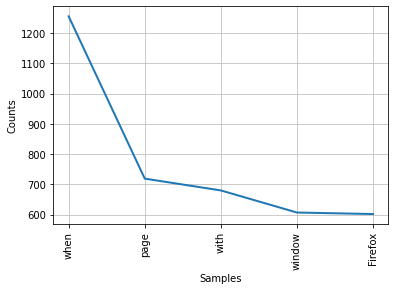

In [31]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(5,cumulative=False)

**Wordcloud** é a representação pictórica das palavras repetidas com mais frequência que representam o tamanho da palavra.

In [32]:
#install library
!pip install wordcloud

In [33]:
# build wordcloud
from wordcloud import WordCloud

wcloud = WordCloud().generate_from_frequencies(frequency_dist)

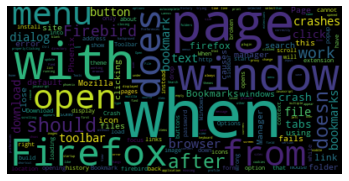

In [34]:
# plotting the wordcloud

import matplotlib.pyplot as plt

plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
(-0.5, 399.5, 199.5, -0.5)
plt.show()

### **10. Construindo um pipeline de pré-processamento de texto**

Sempre que desejar fazer o pré-processamento para qualquer aplicação usando PLN, você pode conectar dados diretamente a esta função de pipeline e obter os dados de texto limpo necessários como saída.

In [35]:
import nltk
nltk.download('wordnet')
  
# function to process the tweet
def processRow(row):
    
    import re
    import nltk
    from textblob import TextBlob
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from textblob import Word
    from nltk.util import ngrams
    import re
    from wordcloud import WordCloud, STOPWORDS
    from nltk.tokenize import word_tokenize
    
    tweet = row

    # lower case
    tweet.lower()

    # removes unicode strings like "\u002c" and "x96" 
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', tweet)       
    tweet = re.sub(r'[^\x00-\x7f]',r'',tweet)
    
    # convert any url to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    
    # convert any @Username to "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)

    # remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)

    # remove not alphanumeric symbols white spaces
    tweet = re.sub(r'[^\w]', ' ', tweet)

    # removes hastag in front of a word """
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')

    # remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()]) 

    # remove multiple exclamation
    tweet = re.sub(r"(\!)\1+", ' ', tweet)

    # remove multiple question marks
    tweet = re.sub(r"(\?)\1+", ' ', tweet)

    # remove multistop
    tweet = re.sub(r"(\.)\1+", ' ', tweet)

    # lemma
    from textblob import Word
    tweet =" ".join([Word(word).lemmatize() for word in tweet.split()])

    # stemmer
    #st = PorterStemmer()
    #tweet=" ".join([st.stem(word) for word in tweet.split()])

    # removes emoticons from text 
    tweet = re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '', tweet)

    # trim
    tweet = tweet.strip('\'"')

    row = tweet

    return row

# read/create the text data
tweet_sample= """How to take control of your #debt 
                 https://personal.vanguard.com/us/insights/saving-investing/debt-management.
                 #Best advice for #family #financial #success (@PrepareToWin)"""

# call the function with your data
processRow(tweet_sample)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'How to take control of your debt URL Best advice for family financial success AT_USER'

**Referência**:

https://www.apress.com/br/book/9781484242667

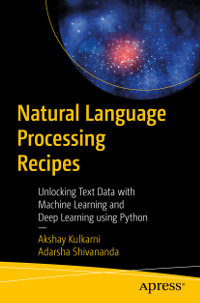